# CIFAR-10 with VGG Architecture
### Included: Data Augmentation Before Vs After

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2025-10-10 10:37:20.135133: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760092640.351825      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760092640.404909      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Load & Preprocess CIFAR-10 Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [ ]:
print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)


Train shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


### Exploring some data

Y-Classes_Names =  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']



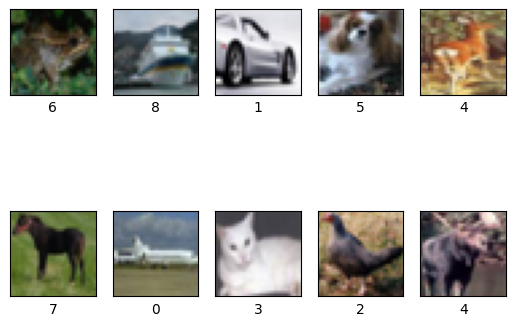

In [ ]:
# Showing 10 random images cifar-10 dataset

import random
import numpy as np

# print y classes_name with its proper wording name
classes_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("Y-Classes_Names = ",classes_name)
print()


# using subplot
for i in range(10):
    index = random.randint(0, len(x_train))
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[index])
    plt.xlabel(y_train[index])
    plt.xticks([])
    plt.yticks([])
plt.show()

### Build a Simplified VGG-Like Model

* For cifar-10 like datasets, the images are small(32x32) and the original VGG was designed for high-resolution images. Therefore, we use a simpler version of VGG to avoid overfitting and reduce training time.

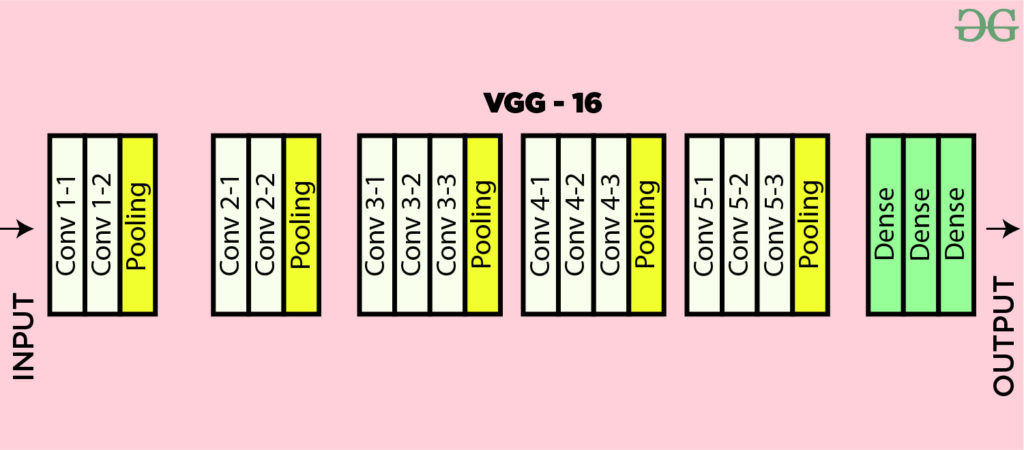

In [ ]:
model = models.Sequential([
    # Block 1
    layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2), strides=2),

    # Block 2
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2), strides=2),

    # Block 3
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2), strides=2),

    # Classification head
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1760092667.452785      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


### Compile the Model

In [ ]:

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,248,202 (12.39 MB)

 Trainable params: 3,248,202 (12.39 MB)

 Non-trainable params: 0 (0.00 B)

### Train without Data Augmentation (Baseline)

In [ ]:
history1 = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20


I0000 00:00:1760092673.990231     101 service.cc:148] XLA service 0x7d8b900121c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760092673.990806     101 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1760092674.384328     101 cuda_dnn.cc:529] Loaded cuDNN version 90300


 13/391 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.1025 - loss: 2.3090

I0000 00:00:1760092678.474605     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.2640 - loss: 1.9661 - val_accuracy: 0.5136 - val_loss: 1.3223
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5392 - loss: 1.2715 - val_accuracy: 0.6352 - val_loss: 1.0291
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6636 - loss: 0.9492 - val_accuracy: 0.7186 - val_loss: 0.8197
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7421 - loss: 0.7444 - val_accuracy: 0.7491 - val_loss: 0.7295
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7892 - loss: 0.6149 - val_accuracy: 0.7720 - val_loss: 0.6733
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8252 - loss: 0.5015 - val_accuracy: 0.7768 - val_loss: 0.6651
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8540 - loss: 0.4187 - val_accuracy: 0.7910 - val_loss: 0.6447
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8767 - loss: 0.3471 - val_accuracy: 0.79

### calculating Accuracy

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc*100:.2f}%")

### Plot Accuracy & Loss before Data Augmentation

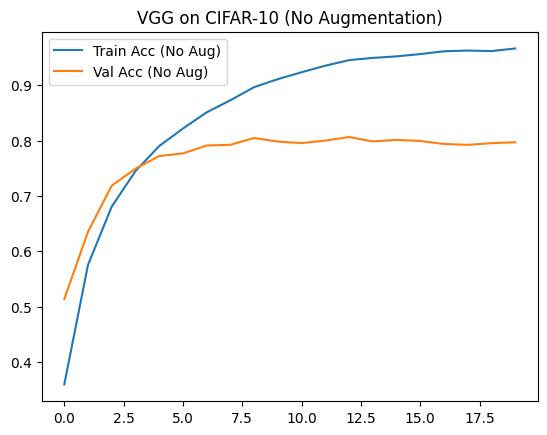

In [ ]:
plt.plot(history1.history['accuracy'], label='Train Acc (No Aug)')
plt.plot(history1.history['val_accuracy'], label='Val Acc (No Aug)')
plt.legend()
plt.title('VGG on CIFAR-10 (No Augmentation)')
plt.show()


# **Now Add Data Augmentation**

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)

### Creating same architecture but as model 2 to retrain from the beginning

In [ ]:
model2 = models.Sequential([
    # Block 1
    layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2), strides=2),

    # Block 2
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2), strides=2),

    # Block 3
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2), strides=2),

    # Classification head
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,248,202 (12.39 MB)

 Trainable params: 3,248,202 (12.39 MB)

 Non-trainable params: 0 (0.00 B)

### Re-train with Augmentation

In [ ]:
history2 = model2.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    epochs=20,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.2444 - loss: 2.0044 - val_accuracy: 0.5133 - val_loss: 1.3366
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.5076 - loss: 1.3561 - val_accuracy: 0.6263 - val_loss: 1.0549
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.6097 - loss: 1.0942 - val_accuracy: 0.6882 - val_loss: 0.8891
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.6675 - loss: 0.9365 - val_accuracy: 0.7199 - val_loss: 0.7956
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.7070 - loss: 0.8445 - val_accuracy: 0.7573 - val_loss: 0.7033
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.7307 - loss: 0.7725 - val_accuracy: 0.7457 - val_loss: 0.7389
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.7510 - loss: 0.7156 - val_accuracy: 0.7875 - val_loss: 0.6146
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.7713 - loss: 0.6643 - 

In [ ]:
test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc*100:.2f}%")

313/313 - 1s - 3ms/step - accuracy: 0.8281 - loss: 0.5309
Test accuracy: 82.81%


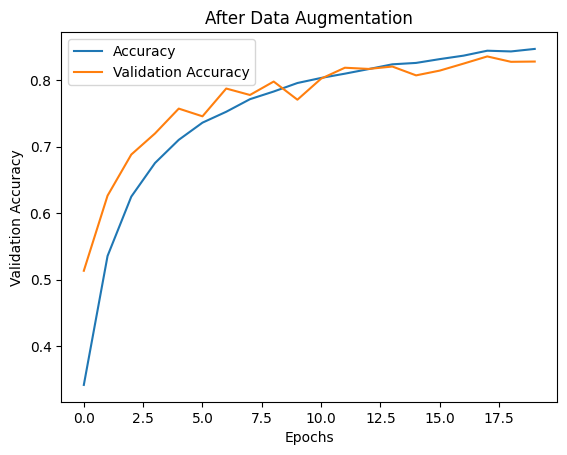

In [ ]:
plt.plot(history2.history['accuracy'], label='Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('After Data Augmentation')
plt.legend()
plt.show()

### Compare Both Results

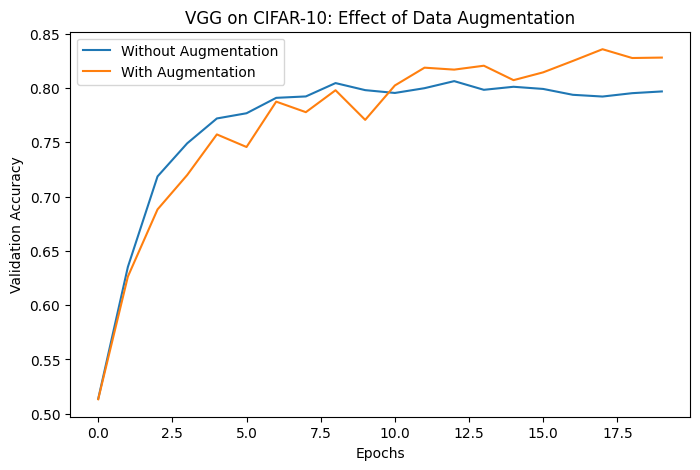

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history1.history['val_accuracy'], label='Without Augmentation')
plt.plot(history2.history['val_accuracy'], label='With Augmentation')
plt.title('VGG on CIFAR-10: Effect of Data Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

## General Prediction on Test Data

Enter any test image index (0–9999):  60


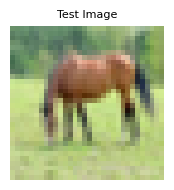

Predicted Label: 7
True Label:      7


In [ ]:
import matplotlib.pyplot as plt

index = int(input("Enter any test image index (0–9999): "))  # CIFAR-10 test set size = 10,000

plt.figure(figsize=(2, 2))  # small, clear image box
plt.imshow(x_test[index])
plt.axis('off')
plt.title("Test Image", fontsize=8)
plt.show()

# Predictions
pred_label = y_pred_classes[index]
true_label = y_test[index]

print(f"Predicted Label: {pred_label}")
print(f"True Label:      {true_label}")
